In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from pyvis.network import Network
import os

Create Network

In [ ]:
class Visualization:
    def __init__(self):
        self.df = pd.read_csv('data/network results/combined_results_1000_filt.csv')

        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

        self.nx_graph = nx.Graph()
        self.edges_with_p_values = []
        self.pyvis_net = Network(notebook=True, height="750px", width="100%")

    def load_data(self):
        self.df = pd.read_csv('data/network results/combined_results_1000_filt.csv')
    
    def process_data(self):
        for _, row in self.df.iterrows():
            dep_node = row['Depression Attribute']
            nmr_node = row['NMR Attribute']
            cvd_node = row['CVD Attribute']
            p_value = row['P-Value']
            chi_sq = row['Chi-Square Statistic']

            if pd.notna(dep_node) and pd.notna(nmr_node):
                if dep_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(dep_node)
                if nmr_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(nmr_node)
                self.edges_with_p_values.append((dep_node, nmr_node, p_value))
            
            if pd.notna(cvd_node) and pd.notna(nmr_node):
                if cvd_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(cvd_node)
                if nmr_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(nmr_node)
                self.edges_with_p_values.append((cvd_node, nmr_node, p_value))

        print(f"Edges collected: {self.edges_with_p_values}")
        
        self.edges_with_p_values.sort(key=lambda x: x[2])
        
    def create_graph(self):
        node_clusters = {}
        for cluster_id, features in self.clusters.items():
            for feature in features:
                color = plt.cm.tab20(cluster_id / len(self.clusters))[:3]  # normalize colors to RGB
                encoded_feature = feature.encode('utf-8', 'ignore').decode('utf-8')
                self.nx_graph.add_node(encoded_feature, color='rgb({}, {}, {})'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255)), title=feature)
                node_clusters[encoded_feature] = cluster_id

        for edge in self.edges_with_p_values:
            node_i, node_j, p_value = edge
            if self.nx_graph.has_node(node_i) and self.nx_graph.has_node(node_j):
                self.nx_graph.add_edge(node_i, node_j, p_value=p_value)
        
    def visualize_network(self):
        self.pyvis_net.from_nx(self.nx_graph)
        
        for edge in self.pyvis_net.edges:
            if edge['from'] == 'CVD' or edge['to'] == 'CVD':
                edge['color'] = 'pink'
            else:
                edge['color'] = 'lightblue'
        
        self.pyvis_net.set_options("""
        var options = {
            "physics": {
                "barnesHut": {
                    "gravitationalConstant": -8000,
                    "centralGravity": 0.3,
                    "springLength": 200,
                    "springConstant": 0.01,
                    "damping": 0.09
                },
                "minVelocity": 0.75
            }
        }
        """)
    
    def save_visualization(self, output_file="network_visualization.html"):
        self.pyvis_net.show(output_file)
        print(f"Visualization saved to {output_file}")


In [ ]:
if __name__ == "__main__":
    visualizer = Visualization()
    visualizer.load_data()
    visualizer.process_data()
    visualizer.create_graph()
    visualizer.visualize_network()
    visualizer.save_visualization()

CVD Significant Clusters

In [ ]:
class CVD_Sig_Clusters:
    def __init__(self, p_values_file='data/network results/combined_results_1000_filt.csv'):
        self.cvd_df = pd.read_csv(p_values_file)
        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C', ''],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

    def filter_data(self):
        self.cvd_df = self.cvd_df.dropna(subset=['CVD Attribute'])

    def calculate_avg_p_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.cvd_df['Clusters'] = self.cvd_df['NMR Attribute'].apply(assign_cluster)
        cvd_average_p_values = self.cvd_df.groupby('Clusters')['P-Value'].mean()
        return cvd_average_p_values

    def calculate_avg_chi_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.cvd_df['Clusters'] = self.cvd_df['NMR Attribute'].apply(assign_cluster)
        cvd_average_chi_values = self.cvd_df.groupby('Clusters')['Chi-Square Statistic'].mean()
        return cvd_average_chi_values

    def save_to_csv(self, output_file='data/network results/cvd_avg_p_chi.csv'):
        # Save averages to CSV
        avg_p_values = self.calculate_avg_p_values()
        avg_chi_values = self.calculate_avg_chi_values()

        categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters',
                      'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins',
                      'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins',
                      'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins',
                      'Other Specific Markers']

        data = zip(categories, avg_chi_values, avg_p_values)

        with open(output_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Category', 'Average_chi', 'Average_P'])
            writer.writerows(data)


In [ ]:
if __name__ == "__main__":
    cvd_evaluator = CVD_Sig_Clusters()
    cvd_evaluator.filter_data()
    avg_p_values = cvd_evaluator.calculate_avg_p_values()
    avg_chi_values = cvd_evaluator.calculate_avg_chi_values()
    cvd_evaluator.save_to_csv()
    print("Avg P-value per cluster:\n", avg_p_values)
    print("Avg Chi per cluster:\n", avg_chi_values)

Depression Significant Clusters

In [ ]:
class DEPR_Sig_Clusters:
    def __init__(self, p_values_file='data/network results/combined_results_1000_filt.csv'):
        self.depr_df = pd.read_csv(p_values_file)
        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

    def filter_data(self):
        self.depr_df = self.depr_df.dropna(subset=['Depression Attribute'])

    def calculate_avg_p_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.depr_df['Clusters'] = self.depr_df['NMR Attribute'].apply(assign_cluster)
        depr_average_p_values = self.depr_df.groupby('Clusters')['P-Value'].mean()
        return depr_average_p_values

    def calculate_avg_chi_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.depr_df['Clusters'] = self.depr_df['NMR Attribute'].apply(assign_cluster)
        depr_average_chi_values = self.depr_df.groupby('Clusters')['Chi-Square Statistic'].mean()
        return depr_average_chi_values

    def save_to_csv(self, output_file='data/network results/depr_avg_p_chi.csv'):
        avg_p_values = self.calculate_avg_p_values()
        avg_chi_values = self.calculate_avg_chi_values()

        categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters',
                      'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins',
                      'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins',
                      'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins',
                      'Other Specific Markers']

        data = zip(categories, avg_chi_values, avg_p_values)

        with open(output_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Category', 'Average_Chi', 'Average_P'])
            writer.writerows(data)

In [ ]:
if __name__ == "__main__":
    depr_evaluator = DEPR_Sig_Clusters()
    depr_evaluator.filter_data()
    avg_p_values = depr_evaluator.calculate_avg_p_values()
    avg_chi_values = depr_evaluator.calculate_avg_chi_values()
    depr_evaluator.save_to_csv()
    print("DEPRESSION")
    print("Avg P-value per cluster:\n", avg_p_values)
    print("Avg Chi per cluster:\n", avg_chi_values)

Comparison of P-values

In [145]:
class VisualizeNetwork:
    def __init__(self, depr_avg_file='data/network results/depr_avg_p_chi.csv', cvd_avg_file='data/network results/cvd_avg_p_chi.csv'):
        self.depr_df_avg = pd.read_csv(depr_avg_file)
        self.cvd_df_avg = pd.read_csv(cvd_avg_file)

    def merge_dataframes(self):
        self.merged_df = pd.merge(self.cvd_df_avg, self.depr_df_avg, on='Category', suffixes=('_CVD', '_Depression'))

    def plot_scatter(self, output_file='plots/cvd_v_depr_p_val.png'):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.merged_df['Average_P_Depression'], self.merged_df['Average_P_CVD'], color='blue', alpha=0.6)
        plt.title('Clusters Average P: Depression vs CVD')
        plt.xlabel('Average P for Depression')
        plt.ylabel('Average P for CVD')
        plt.grid(True)
        for i, category in enumerate(self.merged_df['Category']):
            plt.annotate(category, (self.merged_df['Average_P_Depression'][i], self.merged_df['Average_P_CVD'][i]),
                         textcoords="offset points", xytext=(5, 5), ha='center')
        plt.savefig(output_file, dpi=300)
        plt.show()

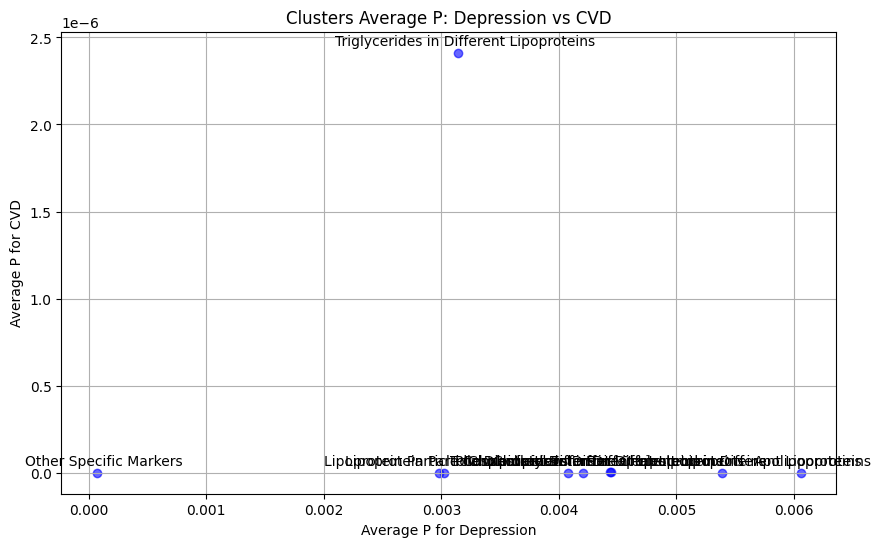

In [146]:
if __name__ == "__main__":
    visualizer = VisualizeNetwork()
    visualizer.merge_dataframes()
    visualizer.plot_scatter()

In [147]:
class VisualizeNetworkClose:
    def __init__(self, depr_avg_file='data/network results/depr_avg_p_chi.csv', cvd_avg_file='data/network results/cvd_avg_p_chi.csv'):
        self.depr_df_avg = pd.read_csv(depr_avg_file)
        self.cvd_df_avg = pd.read_csv(cvd_avg_file)

    def merge_dataframes(self):
        self.merged_df = pd.merge(self.cvd_df_avg, self.depr_df_avg, on='Category', suffixes=('_CVD', '_Depression'))

    def plot_scatter(self, output_file='plots/cvd_v_depr_p_val_close.png', y_min=0.0, y_max=0.0000000000001):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.merged_df['Average_P_Depression'], self.merged_df['Average_P_CVD'], color='blue', alpha=0.6)
        plt.title('Clusters Average P (Close): Depression vs CVD')
        plt.xlabel('Average P for Depression')
        plt.ylabel('Average P for CVD')
        plt.grid(True)
        if y_min is not None and y_max is not None:
            plt.ylim(y_min, y_max)

        for i, category in enumerate(self.merged_df['Category']):
            plt.annotate(category, (self.merged_df['Average_P_Depression'][i], self.merged_df['Average_P_CVD'][i]),
                         textcoords="offset points", xytext=(5, 5), ha='center')
        plt.savefig(output_file, dpi=300)
        plt.show()


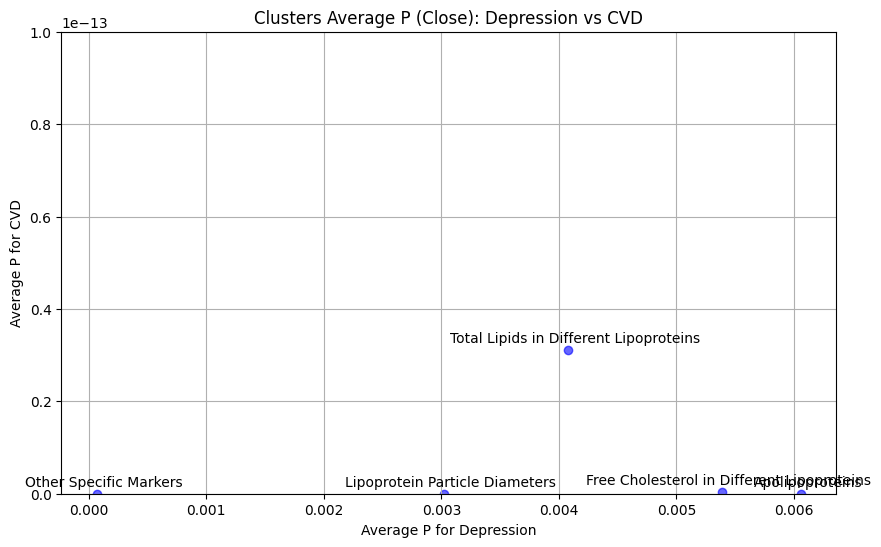

In [148]:
if __name__ == "__main__":
    visualizer = VisualizeNetworkClose()
    visualizer.merge_dataframes()
    visualizer.plot_scatter()

Looking at Clusters

In [137]:
class ClusterPvalues:
    def __init__(self, p_values_file='data/network results/combined_results_1000_filt.csv'):
        self.df = pd.read_csv(p_values_file)
        self.clusters = {
            'Apolipoproteins': ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            'Lipoprotein Particle Diameters': ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            'Free Cholesterol in Different Lipoproteins': ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            'Total Lipids in Different Lipoproteins': ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            'Other Specific Markers': ['Glycoprotein_Acetyls']
        }
        self.depression_attributes = ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic']

    def clean_data(self):
        values_remove = [
            'Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles',
            'Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C',
            'Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol',
            'Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles',
            'Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'
        ]
        # self.df = self.df.dropna(values_remove)
        self.df = self.df[~self.df['NMR Attribute'].isin(values_remove)]
        self.df.to_csv('data/network results/cluster_clean.csv', index=False)

    def filter_by_cluster(self, cluster_name):
        attributes = self.clusters.get(cluster_name, [])
        self.filtered_df = self.df[(self.df['CVD Attribute'].isin(attributes)) & 
                                   (self.df['Depression Attribute'].isin(self.depression_attributes))]

    def separate_cvd(self, output_with_cvd='data/network results/rows_with_cvd.csv', output_with_dep='data/network results/rows_with_dep.csv'):
        # Filter rows with CVD attribute
        self.cvd_rows = self.df[self.df['CVD Attribute'].notna()]
        # Filter rows without CVD attribute
        self.dep_rows = self.df[self.df['CVD Attribute'].isna()]
        
        # Save the separated DataFrames to CSV files
        if output_with_cvd:
            self.cvd_rows.to_csv(output_with_cvd, index=False)
            print(f"Rows with CVD attribute saved to {output_with_cvd}")
        
        if output_with_dep:
            self.dep_rows.to_csv(output_with_dep, index=False)
            print(f"Rows with Dep attribute saved to {output_with_dep}")

    def average_dep_p_values(self, input_file='data/network results/rows_with_dep.csv', output_file='data/network results/averaged_p_values_dep.csv'):
        # Group by NMR Attribute and calculate the average p-value for each
        self.df_dep = pd.read_csv(input_file)
        self.averaged_df_dep = self.df_dep.groupby('NMR Attribute')['P-Value'].mean().reset_index()
        self.averaged_df_dep['Attribute'] = 'Depression'
        self.averaged_df_dep = self.averaged_df_dep[['Attribute', 'NMR Attribute', 'P-Value']]
        
        # Save the averaged DataFrame to a CSV file if a path is provided
        if output_file:
            self.averaged_df_dep.to_csv(output_file, index=False)
            print(f"Averaged p-values saved to {output_file}")

    def average_cvd_p_values(self, input_file='data/network results/rows_with_cvd.csv', output_file='data/network results/averaged_p_values_cvd.csv'):
        # Group by NMR Attribute and calculate the average p-value for each
        self.df_cvd = pd.read_csv(input_file)
        self.averaged_df_cvd = self.df_cvd[self.df_cvd['Comparison'] != 'Depression vs CVD']
        self.averaged_df_cvd['Attribute'] = 'CVD'
        self.averaged_df_cvd = self.averaged_df_cvd[['Attribute', 'NMR Attribute', 'P-Value']]
        
        # Save the averaged DataFrame to a CSV file if a path is provided
        if output_file:
            self.averaged_df_cvd.to_csv(output_file, index=False)
            print(f"Averaged p-values saved to {output_file}")

    def combine_averages(self, output_file='data/network results/combined_averages.csv'):
        self.combined_df = pd.concat([self.averaged_df_dep, self.averaged_df_cvd])
        self.combined_df.to_csv(output_file, index=False)
        print(f"Combined averages saved to {output_file}")

    def plot_scatter(self, input_file='data/network results/combined_averages.csv', output_file='plots/5cluster_p_val.png', y_min=None, y_max=None):
        self.combined_df = pd.read_csv(input_file)
        self.pivot_df = self.combined_df.pivot(index='NMR Attribute', columns='Attribute', values='P-Value').reset_index()
        self.pivot_df['CVD'] = self.pivot_df['CVD'].replace(0, 1e-320)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(self.pivot_df['CVD'], self.pivot_df['Depression'], color='blue', alpha=0.6, s=50)
        plt.xscale('log')
        for i, row in self.pivot_df.iterrows():
            plt.annotate(row['NMR Attribute'], (row['CVD'], row['Depression']), fontsize=8, alpha=0.7)
        plt.title(f'Average P-Value: Depression vs CVD for Top 5 Clusters')
        plt.ylabel('P-Value for CVD')
        plt.xlabel('Average p-Value for Depression')
        plt.grid(True)
        plt.xlim(0, 1e-100)

        if y_min is not None and y_max is not None:
            plt.ylim(y_min, y_max)

        plt.savefig(output_file, dpi=300)
        plt.show()


Rows with CVD attribute saved to data/network results/rows_with_cvd.csv
Rows with Dep attribute saved to data/network results/rows_with_dep.csv
Averaged p-values saved to data/network results/averaged_p_values_dep.csv
Averaged p-values saved to data/network results/averaged_p_values_cvd.csv
Combined averages saved to data/network results/combined_averages.csv


C:\Users\elizl\AppData\Local\Temp\ipykernel_35824\3942843794.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.averaged_df_cvd['Attribute'] = 'CVD'
C:\Users\elizl\AppData\Local\Temp\ipykernel_35824\3942843794.py:88: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e-100)


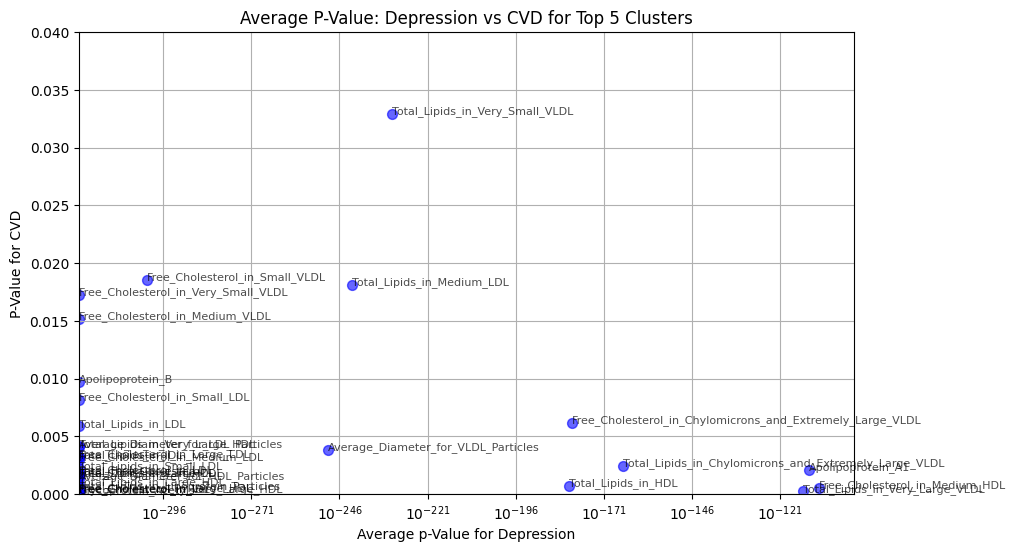

In [138]:
visualizer = ClusterPvalues()
visualizer.clean_data()
visualizer.filter_by_cluster('Apolipoproteins')
visualizer.separate_cvd()
visualizer.average_dep_p_values()
visualizer.average_cvd_p_values()
visualizer.combine_averages()
visualizer.plot_scatter(y_min=0, y_max=0.04)
